<a href="https://colab.research.google.com/github/otanet/hannari_NLP_hands_on_2022/blob/main/Transformer%E3%81%AENLP%E3%81%AE%E6%B4%BB%E7%94%A8%E3%81%B8_20220318_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TransformerのNLPの活用  
GiNZAのライブラリを用いると、以下の3つの言語処理が可能です。  
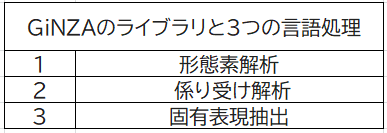

これ以降は、事前学習モデルを用いて、主に以下の5つの大規模データセットを用いた言語処理が可能となります。
いずれも、Haggingface社の公開しているTransformerの事前学習モデルに伴うライブラリを使用します。  
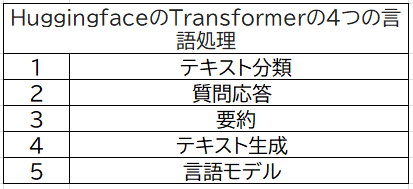




## (個人的な感じ)
今回、BERTの活用に際し、NLTKをはじめとした自然言語処理のライブラリは英語が対象です。spaCyやProdigyなどいくつかあります。

しかし、日本語対応にしたものとなると、GiNZAとHuggingfaceとで動かすなど、選択肢は少なくなります。

当初はBERTの実装を予定していましたが、まずは、既存のものを動かし体感して、それでも手の届かない部分は、改めて、取り組むように、順を追いたいと思っています。

今回は大枠を知ることを第一に考えています。

## まずは、GiNZAをインストールして、基本的な言語処理を体感しましょう！


## 形態素解析とは
文章を形態素という言葉の最小単位に分割する処理のこと。
併せて、それぞれの品詞や見出し語を判別します。

※言葉の最小単位を、トークンと言い、トークン化とも言います。
→形態素解析=トークン化

・トークン化：文を言葉の最小単位に分割する処理のこと
・品詞タグ付け：トークン化の品詞を判別しそれをタグ付けする処理のこと
・レンマ化：トークンを辞書の見出し語に変換する処理のこと

In [1]:
# GiNZAのインストール
!pip install ginza==4.0.5

# メニュー「ランタイム → ランタイムを再起動」で「Google Colab」を再起動

     |████████████████████████████████| 10.4 MB 34.8 MB/s 
     |████████████████████████████████| 51.5 MB 33 kB/s 
     |████████████████████████████████| 2.2 MB 37.0 MB/s 
     |████████████████████████████████| 1.0 MB 38.2 MB/s 
  Created wheel for ginza: filename=ginza-4.0.5-py3-none-any.whl size=15896 sha256=df3c7ad63c718f0298ea0e29817d698dbbbb1f9eb99d13dd80646ca65f54f315
  Stored in directory: /root/.cache/pip/wheels/ba/a9/a2/c1165c004f6dcb415b7a7d145aa4511b5024b5fb1f2eb0c0ea
  Created wheel for ja-ginza: filename=ja_ginza-4.0.0-py3-none-any.whl size=51530814 sha256=8e649ace6876e42b5cf8fbfa7d3dc11f56c1b57bc4ca899251c5a95265a9304f
  Stored in directory: /root/.cache/pip/wheels/a8/f5/4a/5d4877342f912e0b7209d8a65e7ce39fe2c1a3c2511d59acfb
  Created wheel for SudachiDict-core: filename=SudachiDict_core-20211220-py3-none-any.whl size=71565353 sha256=1bdef0e3f5fdaeb4d00d9518e1c55d96ea3db00d806648574440ba720faa3dc2
  Stored in directory: /root/.cache/pip/wheels/17/6d/f6/f9451cbfc76ffdf98

In [1]:
# トークン化の例
import spacy

nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

for token in doc:
    print(token)

グーグル
は
モトローラ
を
買収
し
た
。


## トークンの分割単位とGiNZAの設定
トークンは言葉の最小単位ですが、決まった定義はなく、その時々で決めます。
GiNZAには3つの段階があります。  

例）国家公務員  
  
A:国家/公務/員  
B:国家/公務員  
C:国家公務員  
  
※ ginza.set_split_model()を使用します。  

例）国家公務員  
A:国家/公務/員  

In [2]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, 'A') # 分割単位Aを指定
doc = nlp('私は霞が関の国家公務員です')

for token in doc:
    print(token)

私
は
霞が関
の
国家
公務
員
です


例）国家公務員  
B:国家/公務員  

In [3]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, 'B') # 分割単位Bを設定
doc = nlp('私は霞が関の国家公務員です')

for token in doc:
    print(token)

私
は
霞が関
の
国家
公務員
です


例）国家公務員  
C:国家公務員  

In [4]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, 'C') # 分割単位C
doc = nlp('私は霞が関の国家公務員です')

for token in doc:
    print(token)

私
は
霞が関
の
国家公務員
です


## 品詞タグ付け
品詞タグ付けには、SudachiPyによる品詞タグ付けと、Universal Dependenciesの品詞タグ付けとがあります。  

※特徴  
SudachiPyは日本語に適しています。  
Universal Dependenciesは多言語の横断的な学習に適しています。  

In [5]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

for token in doc:
    print(
        token.text+', '+ # テキスト
        token.tag_+', '+ # SudachiPyの品詞タグ
        token.pos_) # Universal Dependenciesの品詞タグ

グーグル, 名詞-固有名詞-一般, PROPN
は, 助詞-係助詞, ADP
モトローラ, 名詞-固有名詞-一般, PROPN
を, 助詞-格助詞, ADP
買収, 名詞-普通名詞-サ変可能, VERB
し, 動詞-非自立可能, AUX
た, 助動詞, AUX
。, 補助記号-句点, PUNCT


## レンマ化  
トークンを辞書の見出し語に変換する処理のことです。 
辞書の見出し語にそろえると、異なる表記でも同じ単語であることを判別できるようになります。  
  
例）
行か(ない)→行く  
行き(ます)→行く  
行く(。)→行く  
行く時→→行く  
行け(ば)→行く  
行こ(う)→行く  
  
※五段活用の一部のイメージです。  

In [6]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

for token in doc:
    print(
        token.text+', '+ # テキスト
        token.lemma_) # レンマ化 

グーグル, グーグル
は, は
モトローラ, モトローラ
を, を
買収, 買収
し, する
た, た
。, 。


## 文境界解析  
複数の文章を文に解析する処理のことです。  
日本語には、句点(。)がありますが、「?」や「!」で区切られている場合もあります。  
  
例）『彼は「面白い！」とつぶやいた。』  
→会話文が内包されているケースもあり、こういう場合は処理が難しくなります。  

In [7]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文境界解析
for span in doc.sents:
    print(span)

グーグルはモトローラを買収した。


In [8]:
#spanをfor文で回してトークンクラスを取得する
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文境界解析+トークン化
for span in doc.sents:
    for token in span:
        print(token)

グーグル
は
モトローラ
を
買収
し
た
。


## 文節分割
小学校か中学校で、「ね」で区切るのが文節分割に当たります。
日本語は、この文節で分割した方が解析しやすくなる場合もあります。

In [9]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文節分割
for sent in doc.sents:
    for span in ginza.bunsetu_spans(sent):
        print(span)

グーグルは
モトローラを
買収した。


### 文節分割：文節分割+トークン化の場合  
こちらの方が、しっくりくる感じがします。  


In [10]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('銀座でランチをご一緒しましょう。今度の日曜日はどうですか。')

# 文節分割+トークン化
for sent in doc.sents:
    for span in ginza.bunsetu_spans(sent):
        for token in span:
            print(token)

銀座
で
ランチ
を
ご
一緒
し
ましょう
。
今度
の
日曜日
は
どう
です
か
。


## 未知語の発見
## Sudachiのユーザー辞書にcsv形式で登録して、対応します。


In [11]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルに買収されたモトローラ')

#「となりのトトロ」が標準辞書で未対応であることを確認。
for token in doc:
    print(token)

グーグル
に
買収
さ
れ
た
モトローラ


## 係り受け解析(構文解析)とは、
文章を文節や単語に分割した後で、係り受け関係(どの語がどの語を修飾しているか)を識別する処理のことです。  
言語学でいう構文解析に当たります。   

※1 ディープラーニングが出てくる前はCaboChaやKakashiなどがそのツールとしてありました。  
※2 今では、SpaCyなど多言語対応の係り受け解析器が使われています。  


In [12]:
# GiNZAのインストール
!pip install ginza==4.0.5

# メニュー「ランタイム → ランタイムを再起動」で「Google Colab」を再起動

In [1]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文節の係り受け解析
for span in ginza.bunsetu_spans(doc): #ginza.bunsetu_spansをfor文で回して文を分割した文節を取得する
    for token in span.lefts: #span.leftsでその文節にかかっているトークンを取得する
        print(str(ginza.bunsetu_span(token))+' → '+str(span)) #ginza.bunsetu_spanで、そのトークンが含まれている文節を取得する

グーグルは → 買収した。
モトローラを → 買収した。


## 主辞(文節で重要な単語)を抽出
ginza.bunsetu_phrase_spans()を用いる。

In [2]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文節の係り受け解析
for span in ginza.bunsetu_phrase_spans(doc): #ginza.bunsetu_phrase_spans()を用いて主辞を取得する
    for token in span.lefts:
        print(str(ginza.bunsetu_phrase_span(token))+' → '+str(span))

グーグル → 買収
モトローラ → 買収


### コラム 日本語と英語との係り受け構文結果の違い
日本語の文節係り受けは非交差的で、単方向になります。
一方、英語は逆のイメージになります。


## 単語の係り受け解析  
単語の係り受け関係を木構造で表示します。  
この木は閉路のないグラフを指します。  
各単語は木の頂点に対応して、1つの親に対して、複数の子を持つことになります。  
「親→子」

In [3]:
import spacy
from spacy import displacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 単語の係り受け解析
for token in doc:
    print(token.text+' ← '+token.head.text+', '+token.dep_)

# グラフ表示
displacy.render(doc, style='dep', jupyter=True)

グーグル ← 買収, nsubj
は ← グーグル, case
モトローラ ← 買収, obj
を ← モトローラ, case
買収 ← 買収, ROOT
し ← 買収, advcl
た ← 買収, aux
。 ← 買収, punct


In [4]:
# シンプルなグラフ表示
displacy.render(doc, style='dep', jupyter=True, options={'compact':True, 'distance': 90})

## Huggingface Transformerの活用

Haggingface社の公開しているTransformerの事前学習モデルに伴うライブラリを使用します。
Huggingfaceのライブラリを用いると、主に4つのタスクを行うことができます。

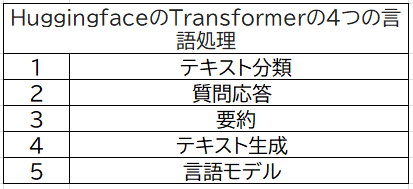

In [5]:
# pipからのHuggingface Transformersのインストール
!pip install transformers[ja]==4.4.2

## ポジネガ判定としてのテキスト分類

In [6]:
from transformers import pipeline

# テキスト分類のパイプラインの準備
nlp = pipeline('sentiment-analysis')

# テキスト
text = 'This movie was very funny.'

# 推論
print(nlp(text))

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998400807380676}]


## 考察

[{'label': 'POSITIVE', 'score': 0.9998400807380676}]

表示の解説
label: ラベル POSITIVE/ NEGATIVE
score: スコア(0.0～1.0)

## 質問応答タスク  
質問応答は、コンテキストと質問から、コンテキスト内の応答を抽出するタスクのこと。  

## Wikipediaの記事をQ&Aの質問応答形式で整備したデータセットがもとになっています。
→SQuAD 

※ 固有表現抽出などが大きく関係しています。  
詳しくは、文章抽出で説明します。  


In [7]:
from transformers import pipeline

# 質問応答のパイプラインの準備
nlp = pipeline('question-answering')

# コンテキスト
context = 'Huggingface Transformers is a deep learning framework provided by Huggingface that specializes in natural language processing. It supports both TensorFlow and PyTorch. You can use deep learning to solve natural language processing tasks such as text classification, question answering, and summary.'

# 質問
question = 'What is a natural language processing task?'

# 推論
print(nlp(question=question, context=context))

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

{'score': 0.6564483046531677, 'start': 245, 'end': 297, 'answer': 'text classification, question answering, and summary'}


/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:315: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  fw_args = {k: torch.tensor(v, device=self.device) for (k, v) in fw_args.items()}


## 結果の考察

{'score': 0.6564483046531677, 'start': 245, 'end': 297, 'answer': 'text classification, question answering, and summary'}  


推論：  
question: 質問  
context: コンテキスト  
  
score: スコア(0.0～1.0)  
start: 応答の開始位置  
end: 応答の終了位置  
answer: 応答の文字列表現  




## 要約
要約とは、本文(長い文章)を要約文(短い文章)に変換する処理のことです。  

※文圧縮なども該当しますし、一部であれば固有表現抽出になります。  

## テキスト生成
ここでは、与えられた文に続くもっともらしいテキストを自動生成するものです。  

※以前は「sentence ordering」と言われていました。

In [8]:
from transformers import pipeline

# 要約のパイプラインの準備
summarizer = pipeline('summarization')

# テキスト
text = 'Huggingface Transformers is a deep learning framework provided by Huggingface that specializes in natural language processing. It supports both TensorFlow and PyTorch. You can use deep learning to solve natural language processing tasks such as text classification, question answering, and summary.'

# 推論
print(summarizer(text, max_length=20, min_length=10))

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1764: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


[{'summary_text': ' Huggingface Transformers is a deep learning framework that specializes in natural language processing . It'}]


## 結果の考察
入力文  
'Huggingface Transformers is a deep learning framework provided by Huggingface that specializes in natural language processing. It supports both TensorFlow and PyTorch. You can use deep learning to solve natural language processing tasks such as text classification, question answering, and summary.'  

出力として、後の続く生成された文  
' Huggingface Transformers is a deep learning framework that specializes in natural language processing . It'  


日本語訳  
入力文  
Huggingface Transformersは、自然言語処理を専門とするHuggingfaceが提供するディープラーニングフレームワークです。 TensorFlowとPyTorchの両方をサポートします。ディープラーニングを使用して、テキスト分類、質問応答、要約などの自然言語処理タスクを解決できます。  

出力生成された文  
Huggingface Transformersは、自然言語処理に特化したディープラーニングフレームワークです。  





In [9]:
from transformers import pipeline

# テキスト生成のパイプラインの準備 (1)
text_generator = pipeline('text-generation')

# テキスト
text = 'Once upon a time there was an old man and an old woman.'

# 推論 (2)
print(text_generator(text, max_length=100, min_length=50))

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time there was an old man and an old woman. He had an old mother and her little boy under his bed, for he had been a boy. And at last he became a boy. And one day he found himself an old man who was an old man. And this old man was, in his youth, so strong that he killed his own family. And when, then, he turned his head from what was coming upon him and then came back to his old friend:'}]


## 結果の考察    
入力文  
'Once upon a time there was an old man and an old woman.'  

生成された出力文  
'Once upon a time there was an old man and an old woman. He had an old mother and her little boy under his bed, for he had been a boy. And at last he became a boy. And one day he found himself an old man who was an old man. And this old man was, in his youth, so strong that he killed his own family. And when, then, he turned his head from what was coming upon him and then came back to his old friend.  

日本語訳  
入力文  
「昔々、老人と老婆がいました。」  
  
出力文  
「昔々、老人と老婆がいました。彼は男の子だったので、彼には老母と彼女の小さな男の子が彼のベッドの下にいました。そしてついに彼は男の子になりました。そしてある日、彼は自分が老人である老人であることに気づきました。そして、この老人は若い頃、自分の家族を殺すほど強かった。そして、それから、彼は彼に来ていたものから頭を向けて、それから彼の古い友人に戻ったとき


In [10]:
from transformers import pipeline

# MLMのパイプラインの準備
nlp = pipeline('fill-mask')

# 推論
print(nlp(f'Once upon a time there was an old man and an old {nlp.tokenizer.mask_token}.'))

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'sequence': 'Once upon a time there was an old man and an old woman.', 'score': 0.4628377854824066, 'token': 693, 'token_str': ' woman'}, {'sequence': 'Once upon a time there was an old man and an old lady.', 'score': 0.28294485807418823, 'token': 6429, 'token_str': ' lady'}, {'sequence': 'Once upon a time there was an old man and an old boy.', 'score': 0.042518194764852524, 'token': 2143, 'token_str': ' boy'}, {'sequence': 'Once upon a time there was an old man and an old man.', 'score': 0.03133092820644379, 'token': 313, 'token_str': ' man'}, {'sequence': 'Once upon a time there was an old man and an old girl.', 'score': 0.019426116719841957, 'token': 1816, 'token_str': ' girl'}]


# 固有表現抽出は、情報抽出で説明します。

In [11]:
from transformers import pipeline

# 固有表現抽出のパイプラインの準備
nlp = pipeline('ner')

# テキスト
text = 'Hansel and Gretel go looking for food.'

# 推論
print(nlp(text))

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

[{'word': 'Hans', 'score': 0.9582629203796387, 'entity': 'I-PER', 'index': 1, 'start': 0, 'end': 4}, {'word': '##el', 'score': 0.7825778126716614, 'entity': 'I-PER', 'index': 2, 'start': 4, 'end': 6}, {'word': 'G', 'score': 0.9706115126609802, 'entity': 'I-PER', 'index': 4, 'start': 11, 'end': 12}, {'word': '##ret', 'score': 0.854692280292511, 'entity': 'I-PER', 'index': 5, 'start': 12, 'end': 15}, {'word': '##el', 'score': 0.8024848103523254, 'entity': 'I-PER', 'index': 6, 'start': 15, 'end': 17}]


In [12]:
from transformers import pipeline

# 翻訳のパイプラインの準備
nlp = pipeline('translation_en_to_de')

# テキスト
text = 'Hansel and Gretel go looking for food.'

# 推論
print(nlp(text, max_length=40, min_length=1))

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1764: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


[{'translation_text': 'Hansel und Gretel suchen nach Nahrung.'}]


## まとめと考察  
GiNZAのインストール  
1.形態素解析  
2.トークンの分割単位  
3.品詞タグ付け  
4.レンマ化  
5.文境界解析  
6.文節分割  
7.未知語とその対応  
8.係り受け解析  
9.主辞(文節で重要な単語)の抽出  
10.単語の係り受け解析  
11.Huggingface Transformerの活用に向けて  

## 考察：  
係り受け解析の結果だけでも、英語と日本語の相違が見受けられました。  
これ以降は、ファインチューニングしながら、各々のタスクに対して、欠けていることを検討し、少しでも改善することが求められています。  
  
この段階になると、形態素解析のトークンの程度や固有表現抽出の細かな設定を加味して、コスト・ベネフィットで進めてゆくものと思います。  

参考文献一覧
参考文献一覧

displaCy Named Entity Visualizer · Explosion
https://explosion.ai/demos/displacy-ent

Explosion.aiのdisplaCy
https://explosion.ai/demos/displacy ## Explosion.aiのdisplaCy

日本語Winograd Schema Challengeの構築と分析
言語処理学会 第21回年次大会 発表論文集 (2015年3月)
https://www.anlp.jp/proceedings/annual_meeting/2015/pdf_dir/E3-1.pdf

displaCy Dependency Visualizer · Explosion
https://explosion.ai/demos/displacy

※Pythonによる自然言語処理ハンズオン1 資料 2022/02/25
https://www.slideshare.net/otanet/python-nlp-handson20220225v5

共参照解析のための事象間関係知識の文脈化
http://naoya-i.github.io/resources/nlp2014-paper.pdf

Language modeling
https://huggingface.co/docs/transformers/tasks/language_modeling

Text classification
https://huggingface.co/docs/transformers/tasks/sequence_classification

Pipelines for inference
https://huggingface.co/docs/transformers/pipeline_tutorial